# Indian Liver Patient Records
Patient records collected from North East of Andhra Pradesh, India

[Source](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)

### sinh viên : Ngô Minh Khôi, Ngô Mộng Hoàn, Nguyễn Phúc Minh Đăng

## About Dataset

### Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease 1, or no disease 2)

## Reading data

In [45]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [46]:
#Read the training & test data
liver_df = pd.read_csv('indian_liver_patient.csv')
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Data Analysis

In [47]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [48]:
# Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [49]:
# Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [50]:
liver_df.dropna(subset=['Albumin_and_Globulin_Ratio'], inplace=True) #Dropping the null values from the AGR column

## Feature selection

Number of patients diagnosed with liver disease:  414
Number of patients not diagnosed with liver disease:  165


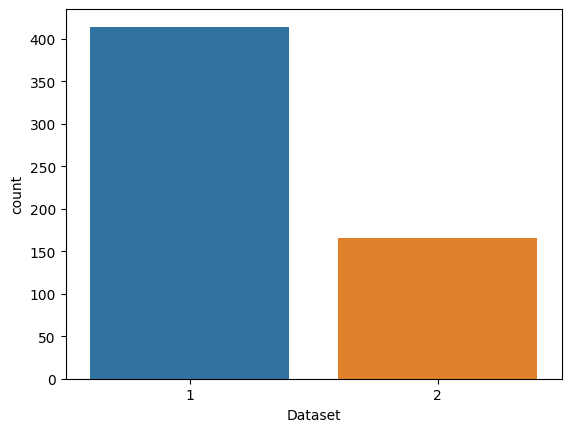

In [51]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  439
Number of patients that are female:  140


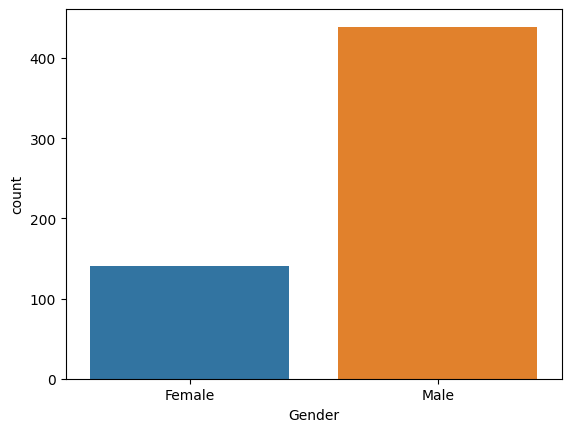

In [52]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

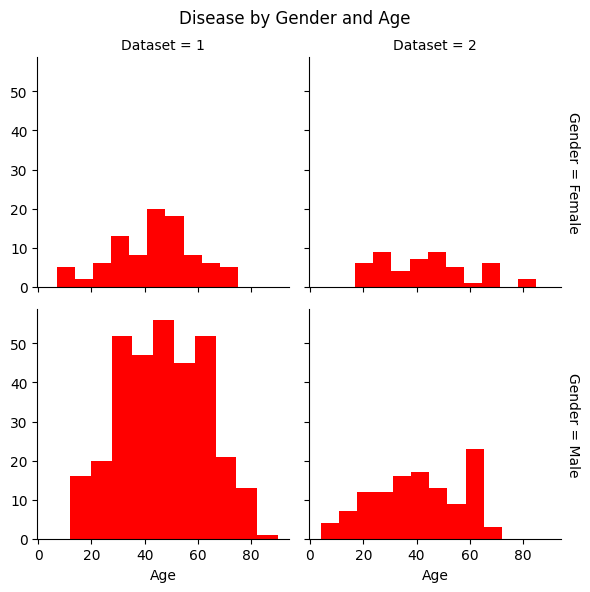

In [53]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

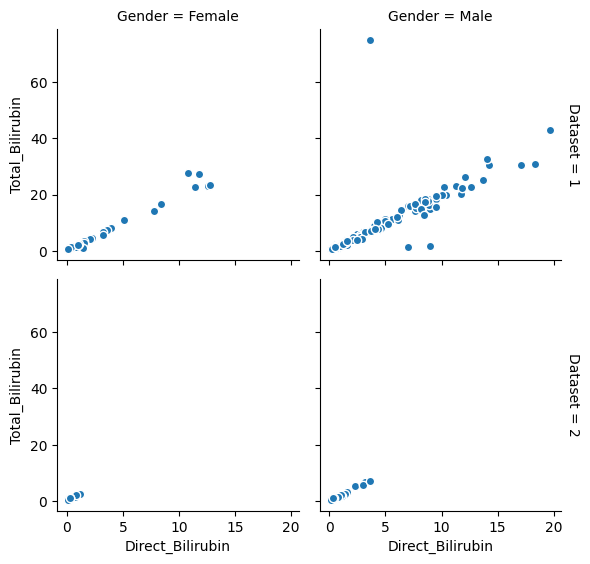

In [54]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)
# biểu diễn điểm dữ liệu

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

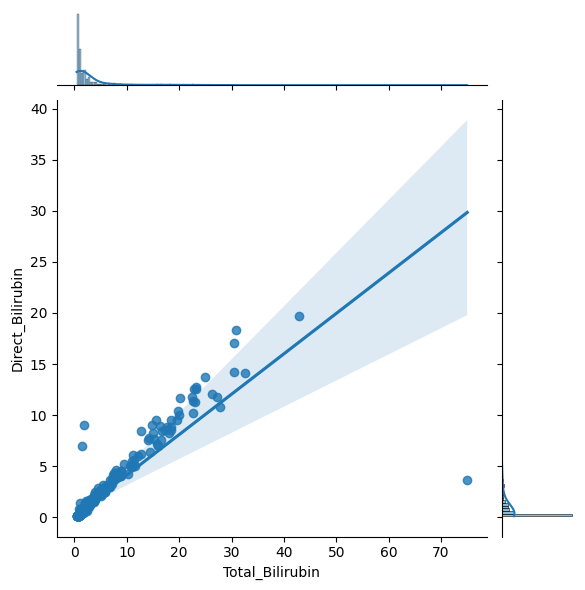

In [55]:
sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=liver_df, kind="reg")

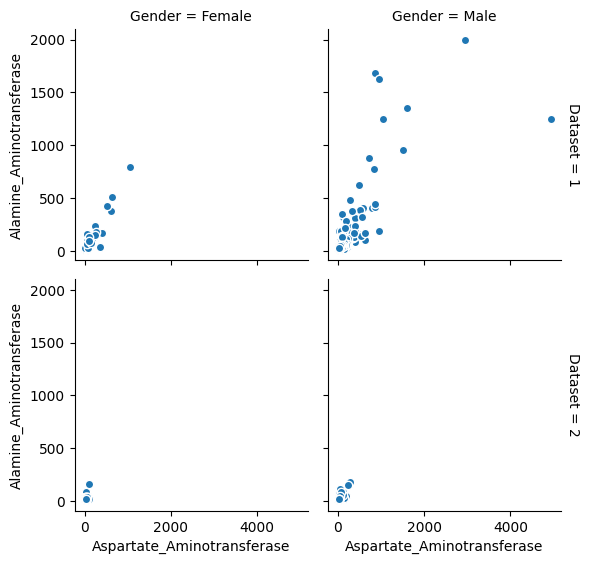

In [56]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

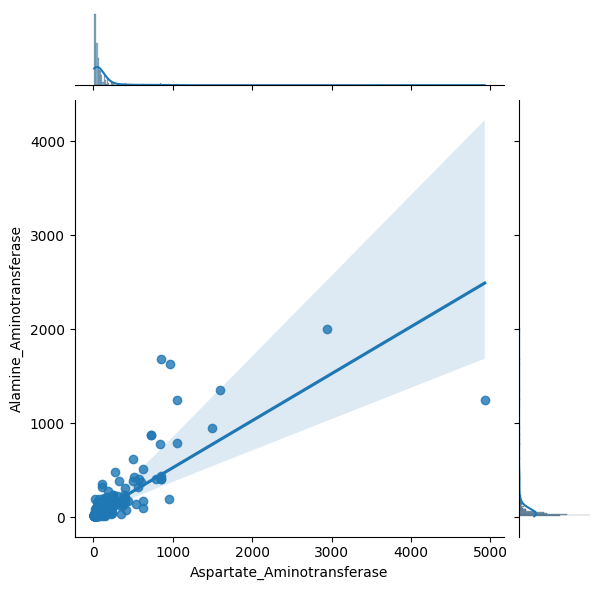

In [57]:
sns.jointplot(x="Aspartate_Aminotransferase", y="Alamine_Aminotransferase", data=liver_df, kind="reg")

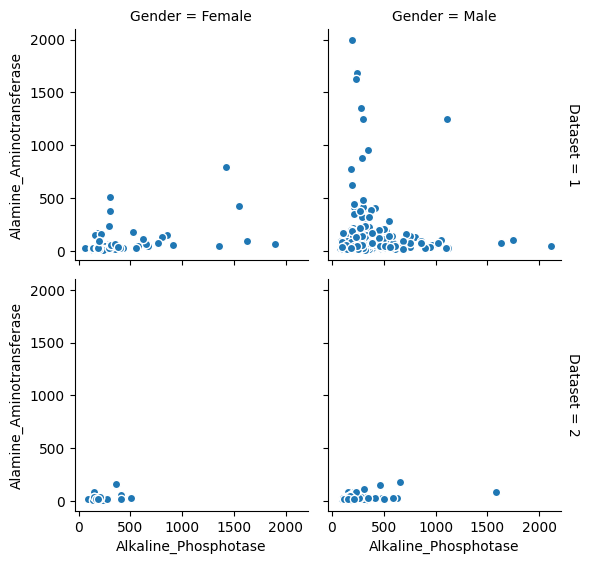

In [58]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

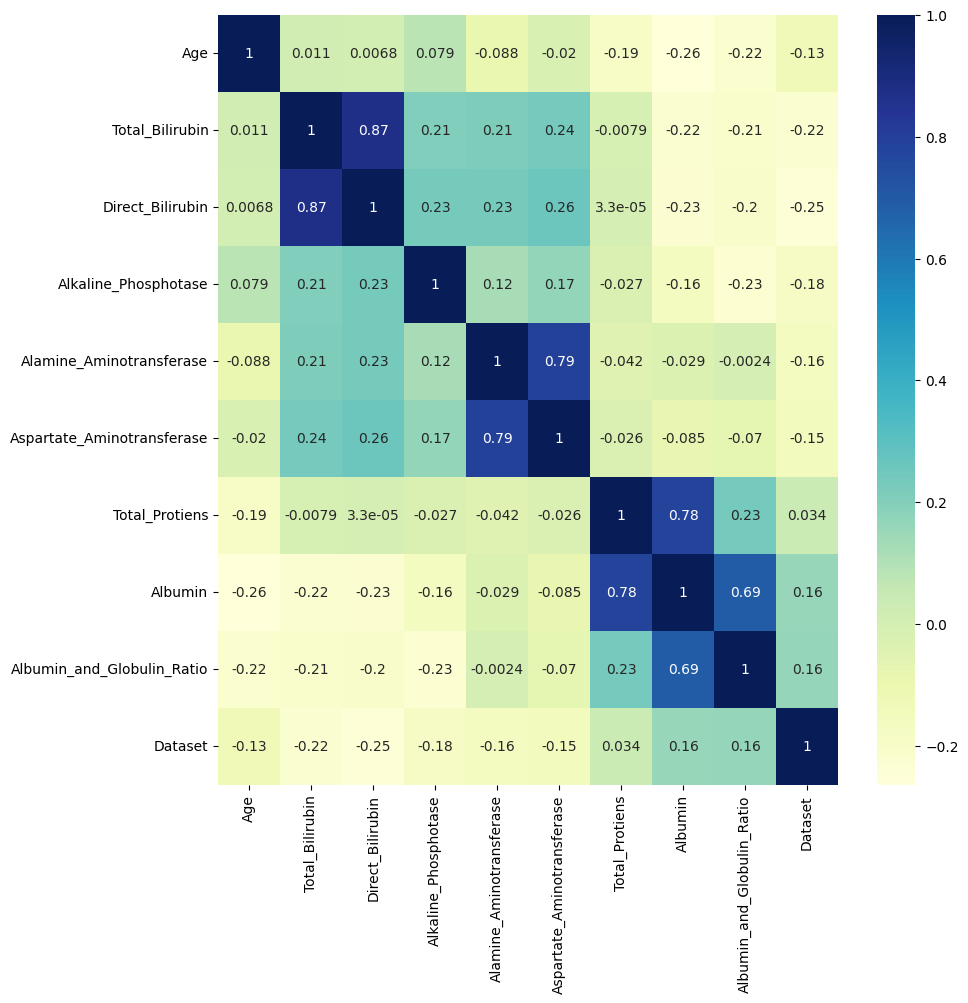

In [59]:
# Assuming liver_df is your DataFrame
numeric_columns = liver_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 10))
sns.heatmap(liver_df[numeric_columns].corr(), annot=True, cmap="YlGnBu")

plt.show()

**The above correlation also indicates the following correlation**
- Total_Protiens & Albumin
- Alamine_Aminotransferase & Aspartate_Aminotransferase
- Direct_Bilirubin & Total_Bilirubin
- There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [60]:
liver_df = pd.get_dummies(liver_df, columns=['Gender']) # Convert categorical variable into dummy/indicator variables.
liver_df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate the features and the target variable
X = liver_df.drop('Dataset', axis=1)
y = liver_df['Dataset']

# Apply the chi-square test to select the top k features
k = 11  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the top k features
top_feature_indices = selector.get_support(indices=True)

# Get the names of the top k features
top_features = X.columns[top_feature_indices]

# Rank the attribute importance
attribute_importance = sorted(zip(top_features, selector.scores_[top_feature_indices]), key=lambda x: x[1], reverse=True)

# Print the attribute importance
for attribute, score in attribute_importance:
    print(f"{attribute}: {score}")


Aspartate_Aminotransferase: 10138.860197313144
Alamine_Aminotransferase: 6361.1419431131435
Alkaline_Phosphotase: 3956.690966596116
Total_Bilirubin: 327.91305830966076
Direct_Bilirubin: 186.1197763987774
Age: 60.22667707514468
Albumin: 2.966936131017993
Gender_Female: 2.905184453227932
Albumin_and_Globulin_Ratio: 1.658882314232185
Gender_Male: 0.9264825135578818
Total_Protiens: 0.11853481528961118


Selected features:
- Aspartate_Aminotransferase
- Alamine_Aminotransferase
- Alkaline_Phosphotase
- Total_Bilirubin
- Direct_Bilirubin
- Age


In [62]:
selected_features = ['Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Total_Bilirubin', 'Direct_Bilirubin', 'Age', 'Dataset']

# Access the selected features from the liver_df dataframe
selected_df = liver_df[selected_features]


## Machine Learning

In [63]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = selected_df.drop('Dataset', axis=1)
y = selected_df['Dataset']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
# chọn biến cần dự đoán là dataset


Train set shape: (463, 6) (463,)
Test set shape: (116, 6) (116,)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> BASIC MODEL
 </b></p>
</div>

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, auc

def make_confusion_matrix(cm):
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    axe = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12})
    axe.set(xlabel="Predict", ylabel="Actual")



# DECISION TREE



              precision    recall  f1-score   support

           1       0.69      0.77      0.73        73
           2       0.51      0.42      0.46        43

    accuracy                           0.64       116
   macro avg       0.60      0.59      0.59       116
weighted avg       0.63      0.64      0.63       116



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


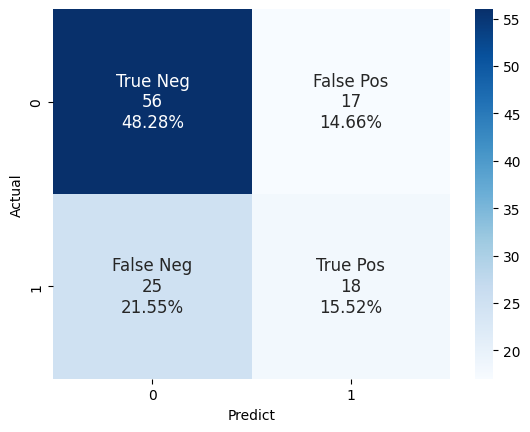

In [65]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_DT_pred = DT.predict(X_test.values)

classification_report_DT = classification_report(y_test, y_DT_pred)
print(classification_report_DT)

confusion_matrix_DT = confusion_matrix(y_test, y_DT_pred)
make_confusion_matrix (confusion_matrix_DT)



# KNN

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.65      0.82      0.73        73
           2       0.46      0.26      0.33        43

    accuracy                           0.61       116
   macro avg       0.56      0.54      0.53       116
weighted avg       0.58      0.61      0.58       116



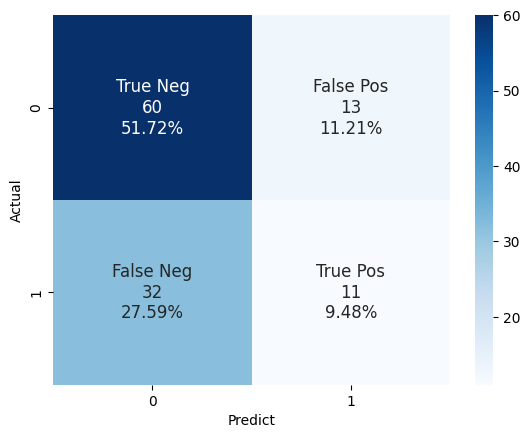

In [66]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
y_KNN_pred = KNN.predict(X_test.values)

classification_report_KNN = classification_report(y_test, y_KNN_pred)
print(classification_report_KNN)

confusion_matrix_KNN = confusion_matrix(y_test, y_KNN_pred)
make_confusion_matrix (confusion_matrix_KNN)



# NAIVE BAYES

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.93      0.36      0.51        73
           2       0.47      0.95      0.63        43

    accuracy                           0.58       116
   macro avg       0.70      0.65      0.57       116
weighted avg       0.76      0.58      0.56       116



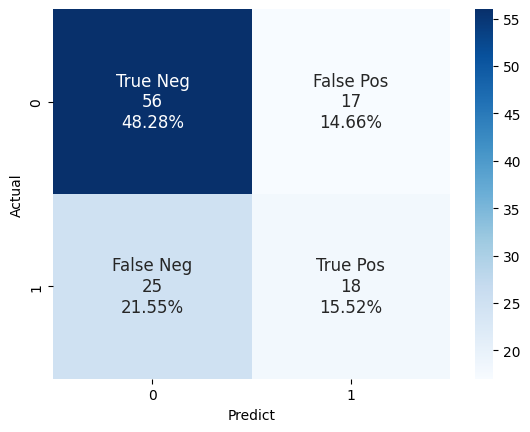

In [67]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_NB_pred = NB.predict(X_test.values)

classification_report_NB = classification_report(y_test, y_NB_pred)
print(classification_report_NB)

confusion_matrix_NB = confusion_matrix(y_test, y_NB_pred)
make_confusion_matrix (confusion_matrix_DT)



# ESSEMBLE LEARNING MODEL


# RANDOMFOREST



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.67      0.90      0.77        73
           2       0.61      0.26      0.36        43

    accuracy                           0.66       116
   macro avg       0.64      0.58      0.57       116
weighted avg       0.65      0.66      0.62       116



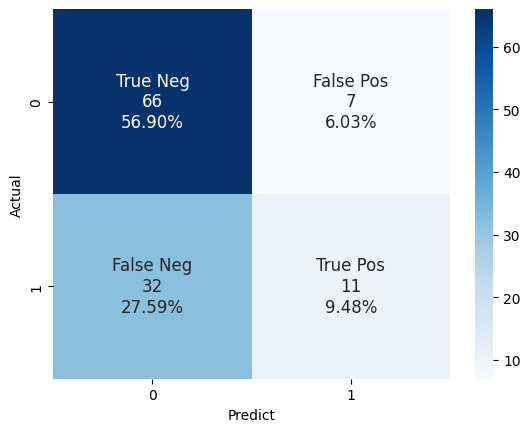

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_RF_pred = RF.predict(X_test.values)

classification_report_RF = classification_report(y_test, y_RF_pred)
print(classification_report_RF)

confusion_matrix_RF = confusion_matrix(y_test, y_RF_pred)
make_confusion_matrix (confusion_matrix_RF)


# ADABOOST

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.69      0.84      0.76        73
           2       0.57      0.37      0.45        43

    accuracy                           0.66       116
   macro avg       0.63      0.60      0.60       116
weighted avg       0.65      0.66      0.64       116



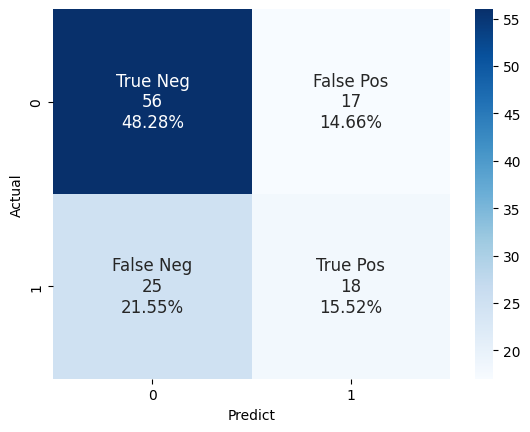

In [69]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
y_AB_pred = AB.predict(X_test.values)

classification_report_AB = classification_report(y_test, y_AB_pred)
print(classification_report_AB)

confusion_matrix_AB = confusion_matrix(y_test, y_AB_pred)
make_confusion_matrix (confusion_matrix_DT)



# Gradient Boosting

Accuracy of Gradient Boosting 0.6379310344827587
              precision    recall  f1-score   support

           1       0.66      0.89      0.76        73
           2       0.53      0.21      0.30        43

    accuracy                           0.64       116
   macro avg       0.59      0.55      0.53       116
weighted avg       0.61      0.64      0.59       116



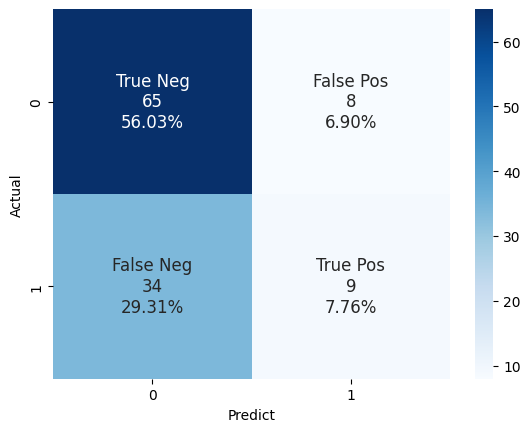

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_GB_pred = GB.predict(X_test)
accuracy_GB_before_improve = accuracy_score(y_test, y_GB_pred)
print("Accuracy of Gradient Boosting",accuracy_GB_before_improve)
print(classification_report(y_test, y_GB_pred))
make_confusion_matrix (confusion_matrix(y_test, y_GB_pred))



# NEURAL NETWORK


In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
accuracies={}
# Create an instance of the MLP Classifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(20, 10),  # Two hidden layers
    max_iter=10000, # Number of iters
    alpha=0.0001, # Regularization constant
    solver='sgd', # Stochastic Gradient Descent
    random_state=42, # Controls the randomness of the weights
    n_iter_no_change=100 # Number of iterations with no improvement to wait before stopping
    )

# Fit the classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracies['MLP'] = accuracy_score(y_test, y_pred)
print("MLP accuracy:", accuracies['MLP'])

MLP accuracy: 0.6293103448275862


# RNN

Epoch 1/10
29/29 [==============================] - 6s 10ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 2/10
29/29 [==============================] - 0s 9ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 3/10
29/29 [==============================] - 0s 10ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 4/10
29/29 [==============================] - 0s 9ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 5/10
29/29 [==============================] - 0s 10ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 6/10
29/29 [==============================] - 0s 9ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 7/10
29/29 [==============================] - 0s 9ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 8/10
29/29 [==============================] - 0s 9ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 9/10
29/29 [==============================] - 0s 9ms/step - loss: 19.4894 - accuracy: 0.0000e+00
Epoch 10/10
29/29 [==============================] - 0s 9ms/step - los

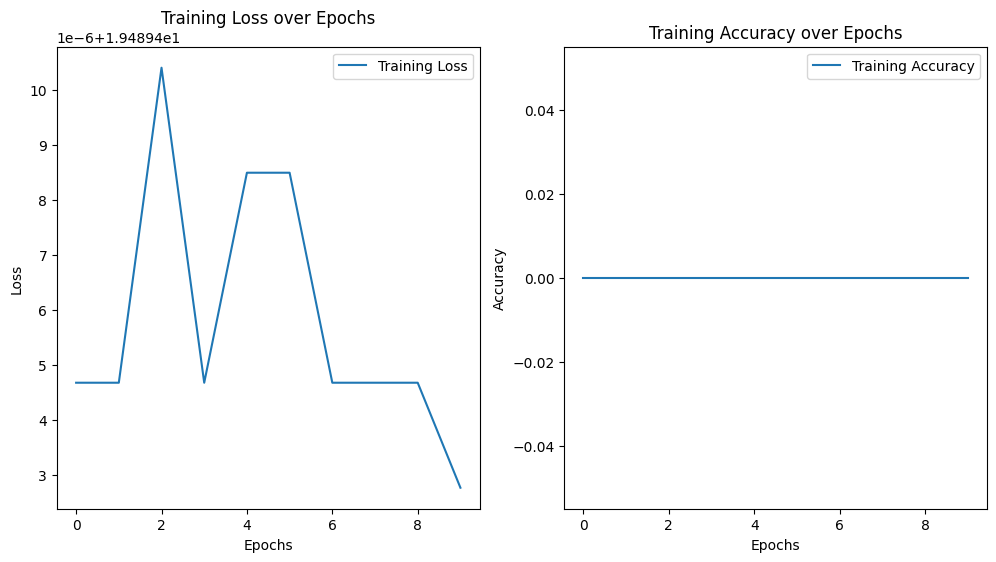

In [72]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have X_train and y_train defined before this point

model_rnn = Sequential([
    LSTM(units=32, input_shape=(6, 1), return_sequences=True),
    LSTM(units=64),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and collect the training history
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=16)

# Plot the training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




KNN accuracy: 0.6120689655172413
Naive Bayes accuracy: 0.5775862068965517
MLP accuracy: 0.6293103448275862
Decision Tree accuracy: 0.6637931034482759
AdaBoost accuracy: 0.6637931034482759
Random Forest accuracy: 0.603448275862069
Gradient Boosting accuracy: 0.6206896551724138


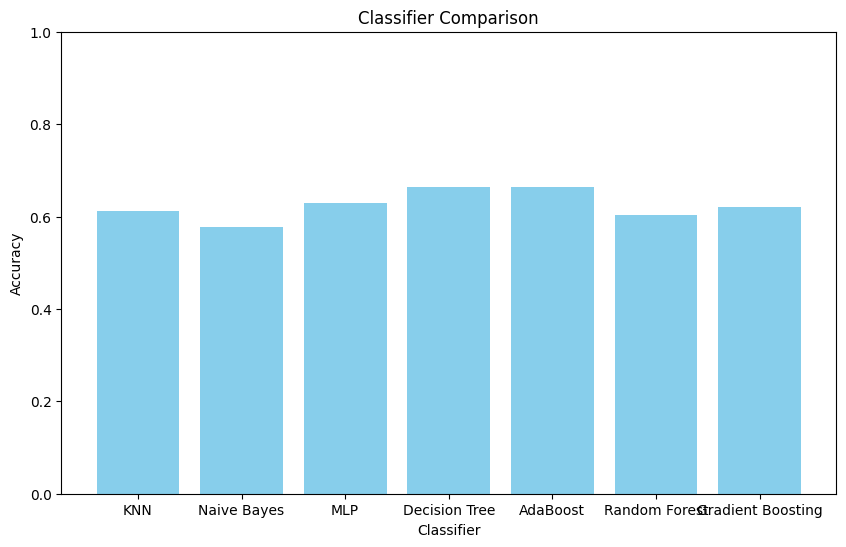

In [80]:


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create instances of classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=7)
naive_bayes_classifier = GaussianNB()
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=10000, alpha=0.0001, solver='sgd', random_state=42, n_iter_no_change=100)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Create a list of classifiers
classifiers = [
    ('KNN', knn_classifier),
    ('Naive Bayes', naive_bayes_classifier),
    ('MLP', mlp_classifier),
    ('Decision Tree', decision_tree_classifier),
    ('AdaBoost', adaboost_classifier),
    ('Random Forest', random_forest_classifier),
    ('Gradient Boosting', gradient_boosting_classifier)
]

# Initialize lists to store classifier names and accuracies
classifier_names = []
accuracies = []

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(name)
    accuracies.append(accuracy)
    print(f"{name} accuracy: {accuracy}")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim([0, 1])
plt.show()
